In [1]:
import pandas as pd

def read_data(filepath):
    f = open(filepath)
    for x in range(11):
        f.readline()
    header = f.readline()
    num_of_objects = (len(header.split('\t')) - 2)//3
    raw_data = []
    for x in f:
        raw_data.append(x)

    ts = []

    objs = []
    for i in range(num_of_objects):
        objs.append(([], [], []))

    for data in raw_data:
        split_data = data.split('\t')
        ts.append(float(split_data[1]))
        for i in range(num_of_objects):
            objs[i][0].append(float(split_data[2 + 3*i]))
            objs[i][1].append(float(split_data[3 + 3*i]))
            objs[i][2].append(float(split_data[4 + 3*i]))

    return ts, objs


C:\Users\Schit\AppData\Local\Temp\ipykernel_15132\1418721698.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  vse = np.linalg.lstsq(np.matrix([np.ones(ts0.size), ts0]).T, 1.0/vs)


curve 1 with koeff 0.013710100482052788
curve 2 with koeff -0.008947017284401443
curve 3 with koeff 0.02353248345947427
curve 4 with koeff 0.011096611931311586
curve 5 with koeff 0.009518200168910118
curve 6 with koeff 0.006400043813716131


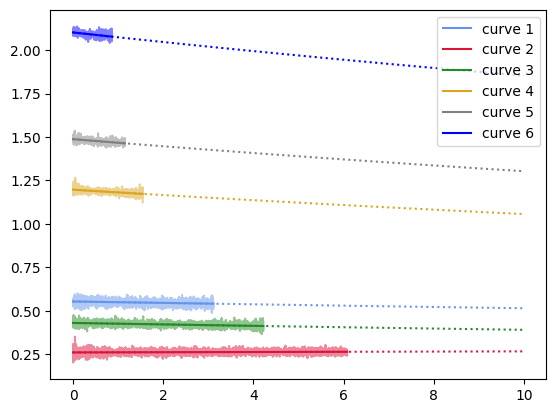

In [2]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['cornflowerblue', 'crimson', 'forestgreen', 'goldenrod', 'gray', 'blue', 'pink']

for i in range(1, 7):
    ts, objs = read_data(f"data/Dag1/1Drm_h23-3g_{i}.tsv")
    xs, ys, zs = objs[0]
    dxs = np.array(xs[1:])-np.array(xs[:-1])
    dys = np.array(ys[1:])-np.array(ys[:-1])
    vs = np.sqrt(dxs**2 + dys**2)
    ts0 = np.array(ts[:-1]) - ts[0]
    vse = np.linalg.lstsq(np.matrix([np.ones(ts0.size), ts0]).T, 1.0/vs)
    plt.plot(ts0, vs, alpha=0.5, color=colors[i-1])
    plt.plot(ts0, 1/(vse[0][0] + vse[0][1]*ts0), label=f'curve {i}', color=colors[i-1])
    plt.plot(np.linspace(0, 10), 1/(vse[0][0] + vse[0][1]*np.linspace(0, 10)), color=colors[i-1], linestyle=':')
    print(f'curve {i} with koeff {vse[0][1]}')

plt.legend()
plt.show()


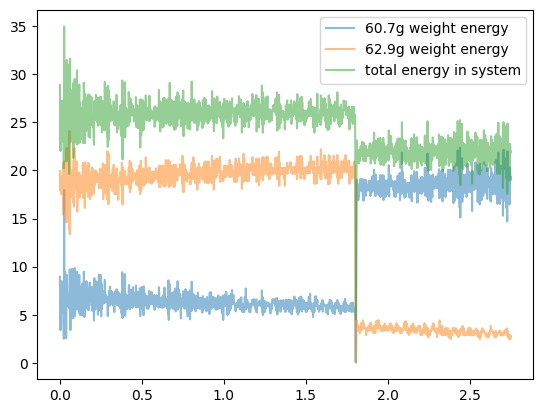

In [4]:

ts, objs = read_data(f"data/Dag2/1De_v60-7g_h62-9g_1.tsv")
xs1, ys1, zs1 = objs[0]
xs2, ys2, zs2 = objs[1]
dxs1 = np.array(xs1[1:])-np.array(xs1[:-1])
dxs2 = np.array(xs2[1:])-np.array(xs2[:-1])
dys1 = np.array(ys1[1:])-np.array(ys1[:-1])
dys2 = np.array(ys2[1:])-np.array(ys2[:-1])
vs1 = dys1**2
vs2 = dys2**2
ts0 = np.array(ts[:-1]) - ts[0]
plt.plot(ts0, 60.7*vs1, alpha=0.5, label='60.7g weight energy')
plt.plot(ts0, 62.9*vs2, alpha=0.5, label='62.9g weight energy')
plt.plot(ts0, 60.7*vs1 + 62.9*vs2, alpha=0.5, label='total energy in system')

plt.legend()
plt.show()